## Udacity Data Analyst Nanodegree
### AB Testing Case Study

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [12]:
# total number of actions
print(len(df['action']))
df['action'].value_counts()

8188


view     6328
click    1860
Name: action, dtype: int64

In [13]:
# number of unique users
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [14]:
# size of control group and experiment group
df['group'].value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [15]:
# duration of this experiment
mint = df['timestamp'].min()
maxt = df['timestamp'].max()
print(mint, maxt)

2016-09-24 17:42:27.839496 2017-01-18 10:24:08.629327


### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [16]:
# action types in this experiment
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

-  The control and experiment pages could have different numbers of total visitors
-  More total clicks could occur in one version, even if there is a greater percentage of clicks in the other version.

### 5. Define the click through rate (CTR) for this experiment.
The number of unique visitors who click at least once divided by the number of unique visitors who view the page

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR new - CTR old > 0 $$
$$H_1: CTR new - CTR old <= 0 $$

##### Does the experiment page drive higher traffic than control page?

In [17]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2797118847539016

In [18]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
# Display click through rate
experiment_ctr

0.3097463284379172

In [19]:
# Compute the observed difference in 
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030034443684015644

In [21]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([  12.,  105.,  475., 1460., 2493., 2665., 1829.,  737.,  186.,
          38.]),
 array([-0.01402622, -0.00545339,  0.00311944,  0.01169227,  0.0202651 ,
         0.02883794,  0.03741077,  0.0459836 ,  0.05455643,  0.06312926,
         0.07170209]),
 <a list of 10 Patch objects>)

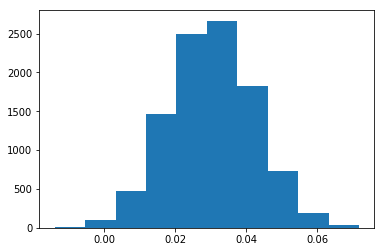

In [24]:
plt.hist(diffs)

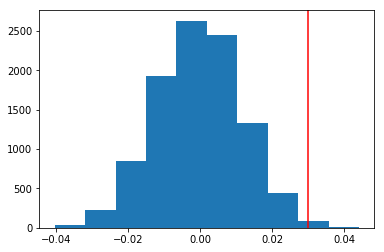

In [28]:
diffs = np.array(diffs)
null_values = np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_values)
plt.axvline(x=obs_diff, color='red')

In [29]:
(null_values > obs_diff).mean()

0.0046

Based on this, we reject the null hypothesis and advice to implement the new page.
#### Enrollment Rate: Click through rate for the Enroll button the course overview page

In [30]:
np.random.seed(42)
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [31]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.23452157598499063

In [32]:
# Get dataframe with all records from control group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr

0.2642986152919928

In [33]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.02977703930700215

In [34]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)

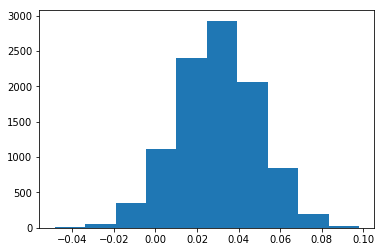

In [35]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

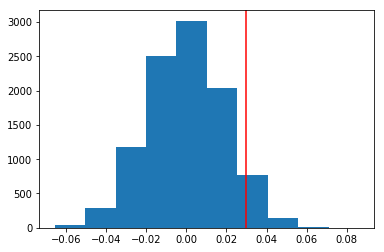

In [36]:
#Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [37]:
(null_vals > obs_diff).mean()

0.0624

With a type I error rate of 0.05, the enrollment rate for this course increases when using the experimental description on its overview page. Thus, we accept the hypothesis

#### Average Classroom Time: Average number of days spent in the classroom for students enrolled in the course

In [38]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [39]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [40]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [41]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

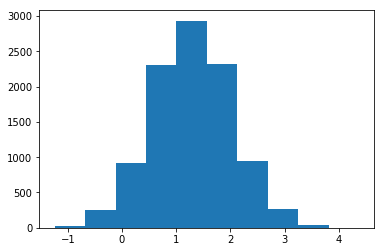

In [42]:
# convert to numpy array
diffs = np.array(diffs)
# plot sampling distribution
plt.hist(diffs);

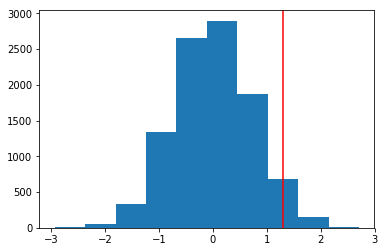

In [43]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
# plot null distribution
plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [44]:
# compute p value
(null_vals > obs_diff).mean()

0.0365

With a type I error rate of 0.05, users spend more time in the classroom after seeing the experimental description in the course overview page thus, we accept the hypothesis

#### Completion Rate: Course completion rate for students enrolled in the course

In [45]:
#classroom actions
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = control_df['completed'].mean()

# Display control complete rate
control_ctr

0.3719951923076923

In [46]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display experiment complete rate
experiment_ctr

0.3935334872979215

In [47]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

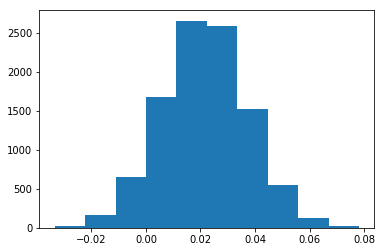

In [48]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df['completed'].mean()
    experiment_ctr = experiment_df['completed'].mean()
    diffs.append(experiment_ctr - control_ctr)
# convert to numpy array
diffs = np.array(diffs)
# plot distribution
plt.hist(diffs);

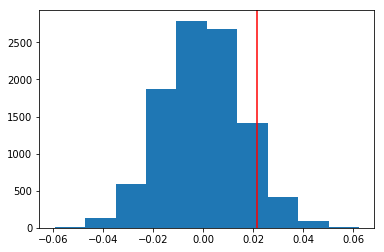

In [49]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [50]:
# compute p value
(null_vals > obs_diff).mean()

0.0852

With a type I error rate of 0.05, this course does not increase in completion rate when using the experimental description on its course overview page. Thus we reject the hypothesis.